In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [2]:
batchSize = 200
input_signals_db = f'/home/gomes/synthetic-data/constrained-signals-{batchSize}.json'
input_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\constrained-signals-{batchSize}.json'

In [3]:
batchSize = 200

workbench = CSCWorkbench(input_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [4]:
with open(input_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

SPARSITY = 3
MAX_SPARSITY = 8
NB_SIGNALS = 50
POS_ERR_THRESHOLD = 10
CORR_ERR_THRESHOLD = 0.75
id0 = next(x['id'] for x in signals_results if x['sparsity'] == SPARSITY and x['snr'] == 10)
signal_dicts = [x for x in signals_results if x['id'] in range(id0, id0 + NB_SIGNALS)]
signal_dicts = signal_dicts[:NB_SIGNALS]


In [5]:
pr_results = []
for signal_dict in signal_dicts:
    pr_curve = workbench.alphaCSCPRCurve(signal_dict, n_samples=20, pos_err_threshold=POS_ERR_THRESHOLD, corr_err_threshold=CORR_ERR_THRESHOLD, verbose=True)
    pr_results.append(pr_curve)


Processing signal 3000
First lambda = 8.00e-04 : len pr_metrics = 0 & n_samples = 20
Iteration 1: lambda = 8.00e-04, number of activations = 28162
Iteration 2: lambda = 4.59e-02, number of activations = 24722
Iteration 3: lambda = 2.31e+00, number of activations = 0
Iteration 4: lambda = 9.12e-02, number of activations = 20156
Iteration 5: lambda = 3.77e+00, number of activations = 0
Iteration 6: lambda = 1.65e-01, number of activations = 15566
Iteration 7: lambda = 5.29e+00, number of activations = 0
Iteration 8: lambda = 2.67e-01, number of activations = 12463
Iteration 9: lambda = 6.92e+00, number of activations = 0
Iteration 10: lambda = 4.00e-01, number of activations = 9008
Iteration 11: lambda = 7.61e+00, number of activations = 0
Iteration 12: lambda = 5.44e-01, number of activations = 7991
Iteration 13: lambda = 9.24e+00, number of activations = 0
Iteration 14: lambda = 7.18e-01, number of activations = 5635
Iteration 15: lambda = 8.81e+00, number of activations = 0
Iteration 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


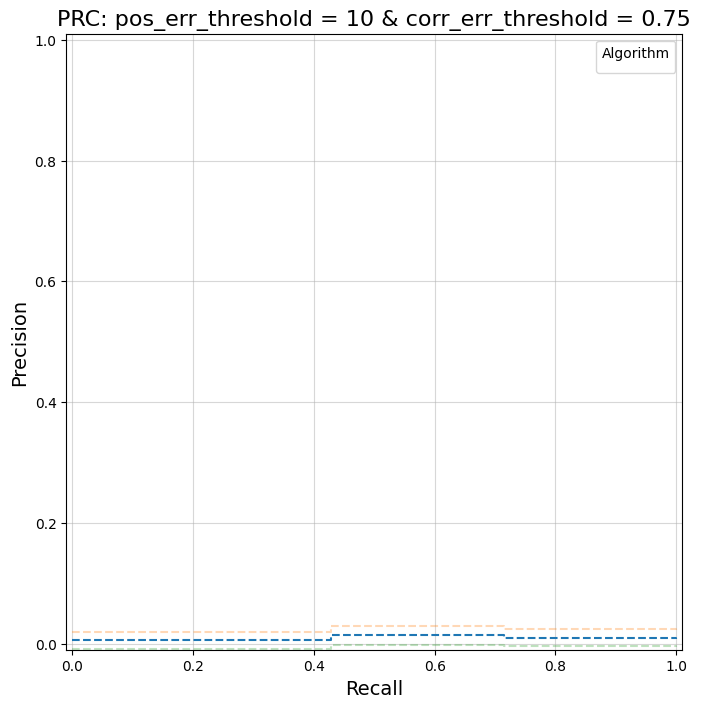

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

pr_mean, pr_mean_plus_std, pr_mean_minus_std = CSCWorkbench.computeMeanPRCurve(pr_results, MAX_SPARSITY)

CSCWorkbench.plotPRCurve(pr_mean, ax=ax)
CSCWorkbench.plotPRCurve(pr_mean_plus_std, ax=ax, alpha=0.3)
CSCWorkbench.plotPRCurve(pr_mean_minus_std, ax=ax, alpha=0.3)

plt.title(f'PRC: pos_err_threshold = {POS_ERR_THRESHOLD} & corr_err_threshold = {CORR_ERR_THRESHOLD}', fontsize=16)
plt.legend(loc='best', title='Algorithm')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(alpha=0.5)
plt.show() 
